# Linear Regression with Python Scikit Learn
## In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression
## In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# AUTHOR: PRIYAL GUPTA

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Check if there any null value in the Dataset
data.isnull == True

False

#### There are no null values in the given dataset

## Visualising the data

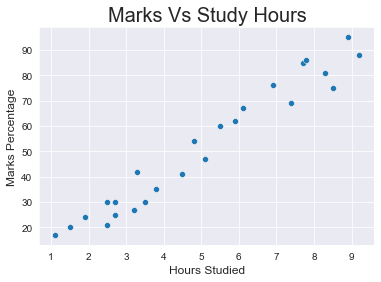

In [4]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### Graph conclusion- From the above plot we can see that there's a linear kind of relationship between marks percentage and hours studied by students

### Plotting regression line

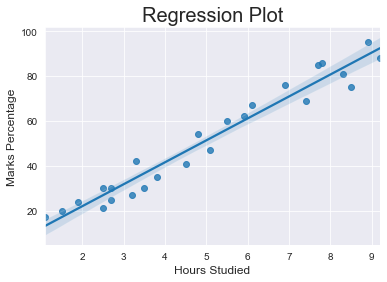

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

#### The above plot confirms the positive correlation between our two variables

## Data Modelling

### Splitting the data into training and test data

In [6]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Fitting the model

In [8]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("********Model Training Complete********")

********Model Training Complete********


## Prediciting the percentage of marks

In [14]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours(hrs)': [i[0] for i in val_X], 'Predicted Score(%)': [k for k in pred_y]})
prediction

,Hours(hrs),Predicted Score(%)
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing Predicted Score with Actual Score

In [15]:
compare = pd.DataFrame({'Actual Score': val_y, 'Predicted Score(%)': pred_y})
compare

,Actual Score,Predicted Score(%)
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Plotting Predicted Score vs Actual Score

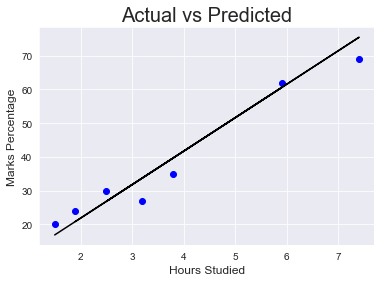

In [16]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Model Evaluation

In [17]:
# Calculating the accuracy of the model
print('Mean Absolute Error(MAE): ',mean_absolute_error(val_y,pred_y))

Mean Absolute Error(MAE):  4.130879918502482


#### Given the small value of MAE we can say that prediction by model is quite accurate

# What will be the predicted score if a student studies for 9.25 hrs/ day?

In [18]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


## According to the result, if a student studies for 9.25 hrs/day he/she is likely to score 93.893%